In [27]:
import pandas as pd

from autumn.tools.project import get_project, load_timeseries, build_rel_path

In [3]:
region = "bangladesh"
project = get_project("sm_sir", region, reload=True)

In [12]:
timeseries_path = str(project.get_path() / "timeseries.json")

<AxesSubplot:>

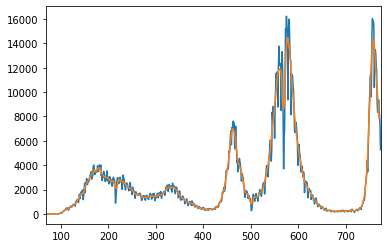

In [40]:
ts_set = load_timeseries(timeseries_path)
notif_smooth = pd.Series(ts_set["notifications"].rolling(window=7, center=True).mean())

ts_set["notifications"].plot()
notif_smooth.plot()
